In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Market Data

In [2]:
start_date = "2010-01-01"

sp500 = yf.download("^GSPC", start=start_date)
vix = yf.download("^VIX", start=start_date)

sp500 = sp500[["Close"]].rename(columns={"Close": "SP500_Close"})
vix = vix[["Close"]].rename(columns={"Close": "VIX_Close"})

df = sp500.join(vix, how="inner")

df.head()

Failed to get ticker '^GSPC' reason: Failed to perform, curl: (6) Could not resolve host: query1.finance.yahoo.com. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,SP500_Close,VIX_Close
Ticker,^GSPC,^VIX
Date,,
2010-01-04,1132.989990,20.040001
2010-01-05,1136.520020,19.350000
2010-01-06,1137.140015,19.160000
2010-01-07,1141.689941,19.059999
2010-01-08,1144.979980,18.129999


In [3]:
df.tail()

Price,SP500_Close,VIX_Close
Ticker,^GSPC,^VIX
Date,,
2026-02-13,6836.169922,20.600000
2026-02-17,6843.220215,20.290001
2026-02-18,6881.310059,19.620001
2026-02-19,6861.890137,20.230000
2026-02-20,6909.509766,19.090000


# Compute Log Returns

In [4]:
df["SP500_LogReturn"] = np.log(
    df["SP500_Close"] / df["SP500_Close"].shift(1)
)

df.head()

Price,SP500_Close,VIX_Close,SP500_LogReturn
Ticker,^GSPC,^VIX,
Date,,,
2010-01-04,1132.989990,20.040001,NaN
2010-01-05,1136.520020,19.350000,0.003111
2010-01-06,1137.140015,19.160000,0.000545
2010-01-07,1141.689941,19.059999,0.003993
2010-01-08,1144.979980,18.129999,0.002878


In [5]:
df = df.dropna()

In [6]:
df.head()

Price,SP500_Close,VIX_Close,SP500_LogReturn
Ticker,^GSPC,^VIX,
Date,,,
2010-01-05,1136.520020,19.350000,0.003111
2010-01-06,1137.140015,19.160000,0.000545
2010-01-07,1141.689941,19.059999,0.003993
2010-01-08,1144.979980,18.129999,0.002878
2010-01-11,1146.979980,17.549999,0.001745


# Basic Descriptive Statistics

In [7]:
df["SP500_LogReturn"].describe()

count    4057.000000
mean        0.000446
std         0.010917
min        -0.127652
25%        -0.003805
50%         0.000698
75%         0.005659
max         0.090895
Name: SP500_LogReturn, dtype: float64

In [8]:
df["SP500_LogReturn"].skew(), df["SP500_LogReturn"].kurt()

(np.float64(-0.6148040343001839), np.float64(13.592660579042448))

# Plot Prices and VIX

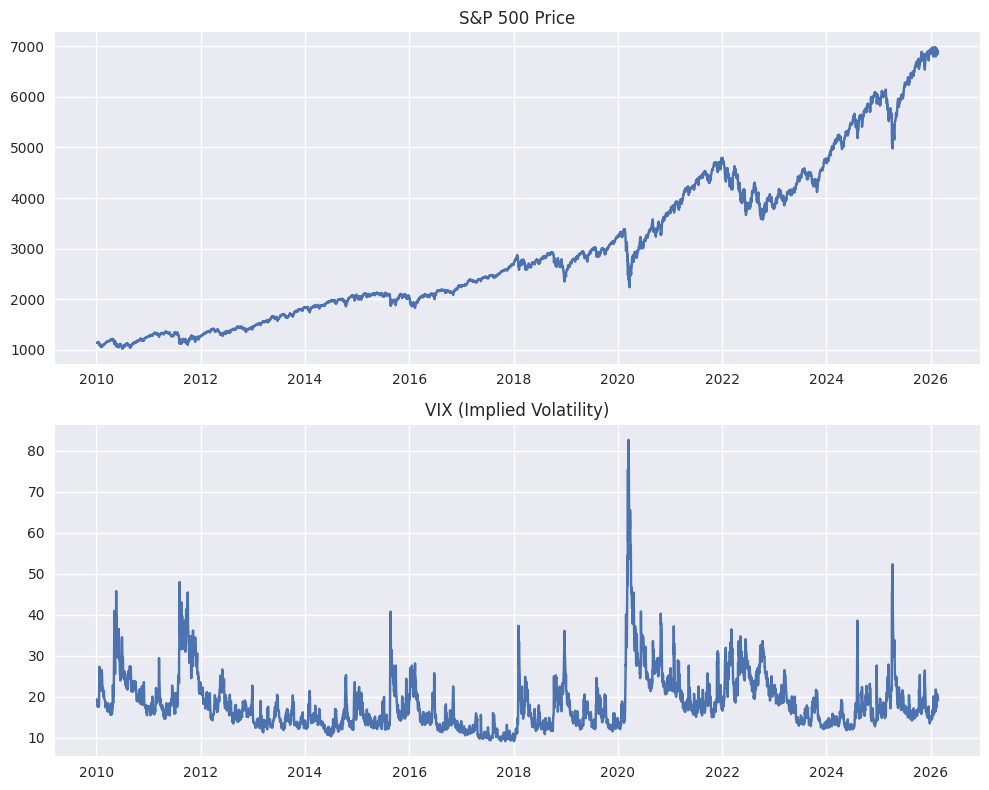

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(df.index, df["SP500_Close"])
ax[0].set_title("S&P 500 Price")

ax[1].plot(df.index, df["VIX_Close"])
ax[1].set_title("VIX (Implied Volatility)")

plt.tight_layout()
plt.show()